In [1]:
import pandas as pd

In [2]:
df_birth_year = pd.read_csv('data/birth_year.csv')
df_birth_year

,auhtor_ID,post,birth_year
0,t2_rnjzutp,Good on you for being responsible! I know self...,2001
1,t2_rnjzutp,"must go to the grocery store with their child,...",2001
2,t2_rnjzutp,"things on her videos, and YouTube took the vid...",2001
3,t2_rnjzutp,their app. There's also a program called SYNC ...,2001
4,t2_rnjzutp,"side. If the cops don't take your side, you'll...",2001
...,...,...,...
41868,t2_mgcj65a,"honest, unbiased news media in the US. That's ...",1974
41869,t2_mgcj65a,"the house, therefore I don't technically *own*...",1974
41870,t2_mgcj65a,"to stop being afraid. Just to be clear here, d...",1974
41871,t2_mgcj65a,saying that if the 2016 election had gone the ...,1974


In [25]:
mil_and_genz = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]
mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
mil_and_genz.loc[(1986 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 1096), 'binary_birth_year'] = 1
mil_and_genz.loc[(1096 < mil_and_genz['birth_year']) & (mil_and_genz['birth_year'] <= 2006), 'binary_birth_year'] = 0
mil_and_genz = mil_and_genz.reset_index(drop=True)
documents = mil_and_genz['post']

<ipython-input-25-9fec532ed052>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mil_and_genz['binary_birth_year'] = mil_and_genz['birth_year']
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)
C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] 

In [17]:
mil = df_birth_year[(1986 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 1996)] #jaartallen moeten nog aangepast worden
genz = df_birth_year[(1996 < df_birth_year['birth_year']) & (df_birth_year['birth_year'] <= 2006)]

In [18]:
mil.shape, genz.shape

(15553, 3)

In [41]:
tokens_mil = mil.post.str.findall('\w+|[^\w\s]')
tokens_genz = genz.post.str.findall('\w+|[^\w\s]')
tokens_mil

17       [1890, -, something, ., The, exact, date, is, ...
18       [on, Saturday, ,, and, took, my, friend, and, ...
19       [read, my, card, with, their, useless, machine...
20       [recently, had, an, x, -, ray, that, showed, a...
21       [suggestions, for, offers, ,, and, negotiated,...
                               ...                        
41740    [clever, political, meme, on, a, sub, about, p...
41741    [Kevin, ., Glück, gehabt, ., I, will, try, !, ...
41742    [Handy, /, der, Cloud, speichern, und, in, der...
41743    [that, ., :, ), ), On, Google, I, cant, find, ...
41744    [Liste, eintragen, lassen, können, ,, sobald, ...
Name: post, Length: 15553, dtype: object

# Word Length

In [88]:
# transform the generation' corpora into lists of word tokens
generational_tokens = {}
generational_tokens['mil'] = [token for token_list in tokens_mil for token in token_list]
generational_tokens['genz'] = [token for token_list in tokens_genz for token in token_list]

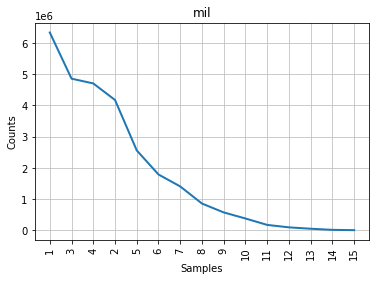

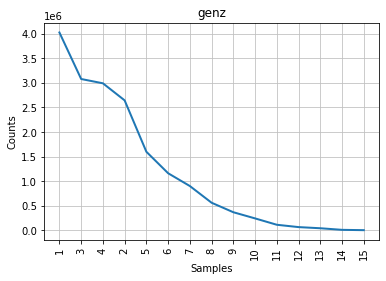

In [89]:
# Get a distribution of token lengths
import nltk

generational_length_distributions = {}
for gen in list(generational_tokens.keys()):
    token_lengths = [len(token) for token in generational_tokens[gen]]
    generational_length_distributions[gen] = nltk.FreqDist(token_lengths)
    # plot a graph of the distribution of word lengths in the corpus, for all words up to length 20
    generational_length_distributions[gen].plot(15,title=gen)
# these plots are called Mendenhall’s Characteristic Curves of Composition

In [90]:
len_shortest_corpus = min(len(generational_tokens['mil']), len(generational_tokens['genz']))
len_shortest_corpus # this is hte len of the genz corpus

17803709

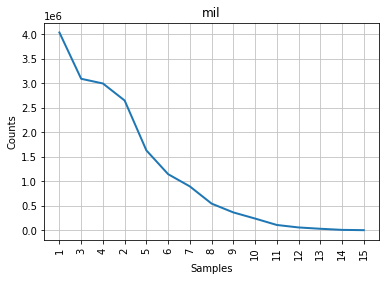

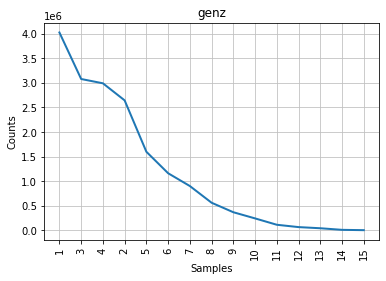

In [91]:
# corrected ofr the difference in corpus length by truncation
generational_length_distributions_corrected = {}
for gen in list(generational_tokens.keys()):
    token_lengths = [len(token) for token in generational_tokens[gen][:len_shortest_corpus]]
    generational_length_distributions_corrected[gen] = nltk.FreqDist(token_lengths)
    # plot a graph of the distribution of word lengths in the corpus, for all words up to length 20
    generational_length_distributions_corrected[gen].plot(15,title=gen)

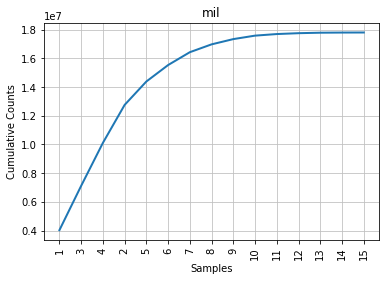

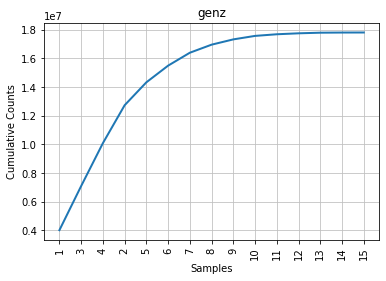

In [92]:
# corrected ofr the difference in corpus length by truncation, cumulative version
generational_length_distributions_corrected = {}
for gen in list(generational_tokens.keys()):
    token_lengths = [len(token) for token in generational_tokens[gen][:len_shortest_corpus]]
    generational_length_distributions_corrected[gen] = nltk.FreqDist(token_lengths)
    # plot a graph of the distribution of word lengths in the corpus, for all words up to length 20
    generational_length_distributions_corrected[gen].plot(15,title=gen, cumulative=True)

# Stopwords

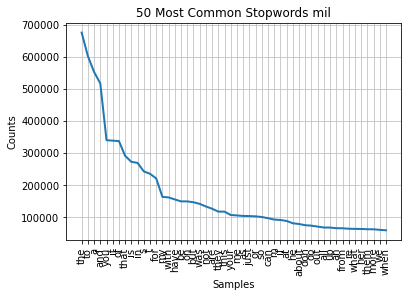

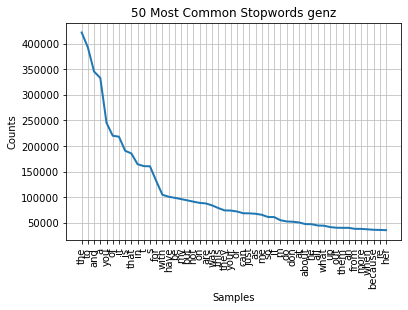

In [104]:
# not corpus length corrected
import matplotlib as plt
from nltk.corpus import stopwords

def stopwords_test(author_corpus, len_shortest_corpus):
    stopwords_by_author_dict = dict()
    stop_words = set(stopwords.words('english'))
    for gen in list(generational_tokens.keys()):
        stopwords_by_author = [word for word in author_corpus[gen] if word in stop_words]
        stopwords_by_author_dict[gen] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_dict[gen].plot(50,label=gen,title='50 Most Common Stopwords '+gen)

stopwords_test(generational_tokens, len_shortest_corpus)

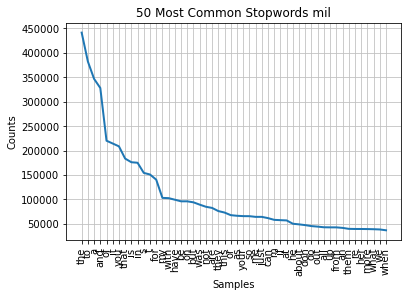

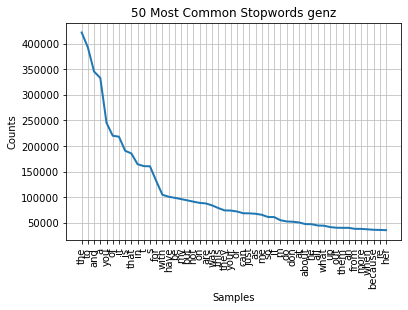

In [103]:
# corpus length corrected
import matplotlib as plt
from nltk.corpus import stopwords

def stopwords_test(author_corpus, len_shortest_corpus):
    stopwords_by_author_dict = dict()
    stop_words = set(stopwords.words('english'))
    for gen in list(generational_tokens.keys()):
        stopwords_by_author = [word for word in author_corpus[gen][:len_shortest_corpus] if word in stop_words]
        stopwords_by_author_dict[gen] = nltk.FreqDist(stopwords_by_author)
        stopwords_by_author_dict[gen].plot(50,label=gen,title='50 Most Common Stopwords '+gen)

stopwords_test(generational_tokens, len_shortest_corpus)

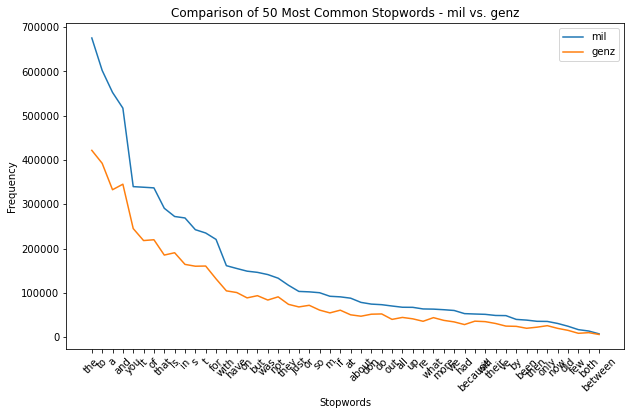

In [127]:
# mutual stopwords, not corpus length corrected
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

def stopwords_comparison(corpus, len_shortest_corpus):
    stopwords_by_author_dict = {}
    stop_words = set(stopwords.words('english'))
    generations = list(corpus.keys())
    gen1, gen2 = generations
    stopwords_gen1 = [word for word in corpus[gen1] if word in stop_words]
    stopwords_gen2 = [word for word in corpus[gen2] if word in stop_words]
    stopwords_by_author_dict[gen1] = nltk.FreqDist(stopwords_gen1)
    stopwords_by_author_dict[gen2] = nltk.FreqDist(stopwords_gen2)

    # Extract the 50 most common stopwords for both generations
    common_stopwords = list((stopwords_by_author_dict[gen1] + stopwords_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [stopwords_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [stopwords_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Stopwords - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

stopwords_comparison(generational_tokens, len_shortest_corpus)

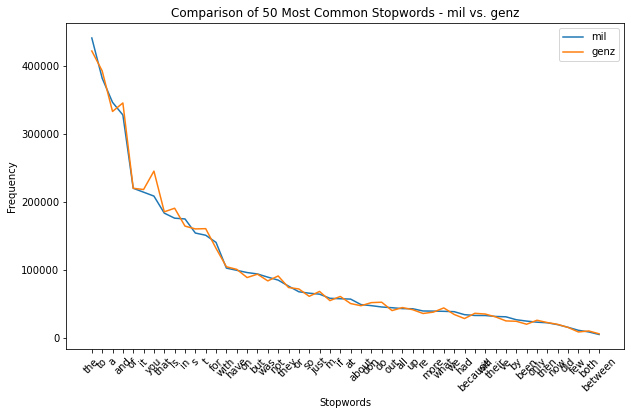

In [126]:
# mutual stopwords, corpus length corrected
import matplotlib.pyplot as plt
import pandas as pd
from nltk.corpus import stopwords

def stopwords_comparison(corpus, len_shortest_corpus):
    stopwords_by_author_dict = {}
    stop_words = set(stopwords.words('english'))
    generations = list(corpus.keys())
    gen1, gen2 = generations
    stopwords_gen1 = [word for word in corpus[gen1][:len_shortest_corpus] if word in stop_words]
    stopwords_gen2 = [word for word in corpus[gen2][:len_shortest_corpus] if word in stop_words]
    stopwords_by_author_dict[gen1] = nltk.FreqDist(stopwords_gen1)
    stopwords_by_author_dict[gen2] = nltk.FreqDist(stopwords_gen2)

    # Extract the 50 most common stopwords for both generations
    common_stopwords = list((stopwords_by_author_dict[gen1] + stopwords_by_author_dict[gen2]).keys())[:50]
    df = pd.DataFrame({
        'Stopword': common_stopwords,
        gen1: [stopwords_by_author_dict[gen1][word] for word in common_stopwords],
        gen2: [stopwords_by_author_dict[gen2][word] for word in common_stopwords]
    })
    # sort the DataFrame by the sum of frequencies in both generations
    df = df.sort_values(by=[gen1, gen2], ascending=False)

    plt.figure(figsize=(10, 6))
    plt.plot(df['Stopword'], df[gen1], label=gen1)
    plt.plot(df['Stopword'], df[gen2], label=gen2)
    plt.xlabel('Stopwords')
    plt.ylabel('Frequency')
    plt.title(f'Comparison of 50 Most Common Stopwords - {gen1} vs. {gen2}')
    plt.legend()
    plt.xticks(rotation=45)
    plt.show()

stopwords_comparison(generational_tokens, len_shortest_corpus)

# POS tagging